# Analysis 2
## Objectives
- find how many different categories are there in businesses on yelp
- find most 10 categories that are popular on yelp
- percents of all businesses does each catogory hold

## Steps
- use business.json in data set
- find categories for each business
- record all categories occurred in data set
- rank them by frequency

In [22]:
%matplotlib inline

In [23]:
import glob
import os
import json
from pathlib import Path
from pandas import Series, DataFrame
import pandas as pd

In [24]:
p = Path(os.getcwd())
business_path = str(p.parent) + '/data/yelp_training_set/yelp_training_set_business.json'

In [25]:
with open(business_path, 'r', encoding='utf-8', errors='ignore') as f:
    for line in f:
        data = json.loads(line)
        categories = data['categories']
        if categories and len(categories) > 0:
            category_list.extend(categories)
print(len(category_list))
category_set = set(category_list)
print(len(category_set))

61782
508


In [26]:
from collections import Counter
category_counter = Counter()
for category in category_list:
    category = category.lower()
    category_counter.update([category])
print([x for x,_ in category_counter.most_common(10)])

['restaurants', 'shopping', 'food', 'beauty & spas', 'nightlife', 'mexican', 'automotive', 'active life', 'bars', 'american (traditional)']


In [27]:
total_num = len(category_list)
total_pct = 0
total_count = 0
df = pd.DataFrame(columns=['category', 'count', 'percent'])
for cate, freq in category_counter.most_common(10):
    pct = freq / total_num
    total_pct += pct
    pct = format(pct*100, '.2f')
    total_count += freq
    df = df.append(Series({'category': cate, 'count': freq, 'percent': pct+'%'}), ignore_index=True)
other_pct = format((1 - total_pct)*100, '.2f')
other_count = total_num - total_count
df = df.append(Series({'category': 'Other', 'count': other_count, 'percent': other_pct+'%'}), ignore_index=True)
df.head(5)

,category,count,percent
0,restaurants,9006.0,14.58%
1,shopping,3362.0,5.44%
2,food,3232.0,5.23%
3,beauty & spas,1528.0,2.47%
4,nightlife,1280.0,2.07%


In [28]:
import matplotlib.pyplot as plt

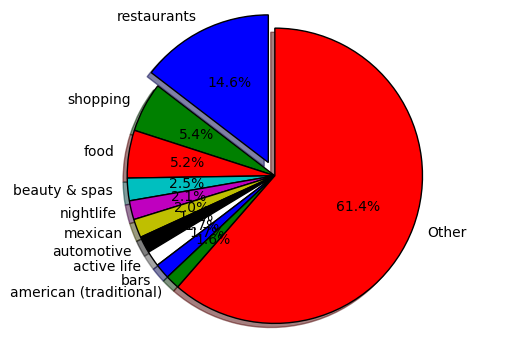

In [29]:
labels = df['category']
sizes = df['count']
explode = [0 for i in range(11)]
explode[0] = 0.1

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('ana_2/categoties.png')

In [30]:
df.to_csv('ana_2/categories.csv', index = False, header = True)